# HDDT analysis - Society #

## An analysis of the societies associated with members of the CEDA 1830 -1870 ##

<img src="society.png">

This graph shows all of the society data in the database rendered by gexf (see iterative sections 1 and 2) 

# Introduction #

985 members of the community are recorded as members of 260 societies and each of these societies constitutes a sphere of interest where meetings between members concerning the CEDA may have taken place, equally they may also be places where members might meet up only infrequently or informally. The visual analysis of connectivity between members in single societies and between members of multiple societies indicates the extent that the community is societally connected. The 985 make up 32% of the entire community. 

The above graph shows the 985 distributed by society membership with the connectivity between them reflected in those members who are associated with more than one society.  

In [2]:
# First we call up the python packages we need to perform the analysis:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(20, 10))
from operator import itemgetter
import networkx as nx
from networkx.algorithms import community #This part of networkx, for community detection, needs to be imported separately.
import nbconvert
import csv

## Iterative Section 1 - (This is an iterative workbook) ##

As can be seen in the illustrative graph above which has been produced in Gephi by the code cells below to provide an initial overview of the data and its distribution, the graph might be made more meaningful if it did not include societies sparsely populated. 

The code cell below and the code cells in the section Iterative Section 2 (below) have therefore been designed so that a second run through the workbook can be made where the second run uses data that excludes low populated occupations identified in the first run through.

In [3]:
# Second we call up the csv files generated from the SQL database that contain information about 
# locations and the community members associated with locations. As well as enabling the locations to be listed 
# we produce a 'node_names' file and a tuples file of edges_attributes to generate the files need to 
# produce GefX files for Gephi.

# We can run the code cell twice, first with all data and once all data has been examined
# and a decision made to exclude 'noise' the code block can be run again with newly generated 
# csv files that exclude low populated locations.

society = pd.read_csv ('society_202107221307.csv')

# Use these csv files in the 'with open' statements below to generate locations.gexf
names = pd.read_csv ('vw_3_society_names_1_2_202108041032.csv')# For nodes csv
tuples = pd.read_csv ('vw_2_society_membership_xid_202108041037.csv')# For edges.csv

# Use these csv files in the 'with open' statements below to generate locations_10.gexf
society_10_names = pd.read_csv ('vw_society_10_names_1_2_202108041124.csv') # For nodes csv
society_10_tuples = pd.read_csv ('vw_society_10_202108041124.csv') # For edges.csv


with open('vw_society_10_names_1_2_202108041124.csv', 'r') as nodecsv: # Open the Nodes csv file
    nodereader = csv.reader(nodecsv) # Read the csv
    nodes = [n for n in nodereader][1:]# Retrieve the data (using Python list comprhension and list slicing
                                       # to remove the header row
    node_names = [n[0] for n in nodes] # Get a list of only the node names

with open('vw_society_10_202108041124.csv', 'r') as edgecsv: # Open the file
    edgereader = csv.reader(edgecsv) # Read the csv
    edge_list = list(edgereader) # Convert to list, so can iterate below in for loop
    
    # Create empty arrays to store edge data and edge attribute data
    edges = []
    edges_attributes = []
    
    # Fill the arrays with data from CSV
    for e in edge_list[1:]:
        edges.append(tuple(e[0:2])) # Get the first 2 columns (source, target) and add to array
        # not used this time. edges_attributes.append(tuple(e[2:4])) 
        # Get the 3rd and 4th columns (first_year, last_year) and add to array
    
edge_names = [e[0] for e in edges] # Get a list of only the edge names   

## We begin by listing out and validating all of the occupation data in the database ##

In [4]:
# List out the societies to be analysed

society

,id,name,notes
0,2,Royal College of Surgeons,NaN
1,3,Pathological Society of London,NaN
2,4,Harveian Society,NaN
3,5,Medical Society of London,NaN
4,6,Medical and Chirurgical Society of London,NaN
...,...,...,...
255,257,Philomatic Society of Paris,NaN
256,258,Bacup Natural History Society,NaN
257,259,Saint Petersburg Academy of Sciences,NaN
258,260,Russian Geographic Society,NaN


In [5]:
# List out the community members who have been associated with at least one society.

names

,Name
0,"A , jun Ramsay"
1,A G Cross
2,A Ioannides
3,Aberdeen Horticultural Society
4,Academia Quirurgia of Madrid
...,...
980,x Milton
981,x Moon
982,"x Ripon, De Grey and"
983,x Rosehill


In [6]:
# Finally list out the tuples of members and societies 
# (Note - some members are associated with more that one society)

tuples

,Source,Target
0,William (2) Adams,Royal College of Surgeons
1,William (2) Adams,Pathological Society of London
2,William (2) Adams,Medical Society of London
3,William (2) Adams,Medical and Chirurgical Society of London
4,William Adlam,Somersetshire Archaeological and Natural Histo...
...,...,...
1233,William Cort Wright,Manchester Literary and Philosophical Society
1234,William Cort Wright,Chemical Society
1235,W Holt Yates,Royal College of Physicians
1236,Robert Younge,York Philosphical Society


## Use pyplot to make an inital visualisation of the data ##

We can see that many occupations are thinly populated. 

We can also see that whilst 'Royal college of Surgeons','Geological Society' and 'Royal Geographical Society' are the largest societal segments several other occupations are well represented. 

none of the inital segmentation requires qualification. 

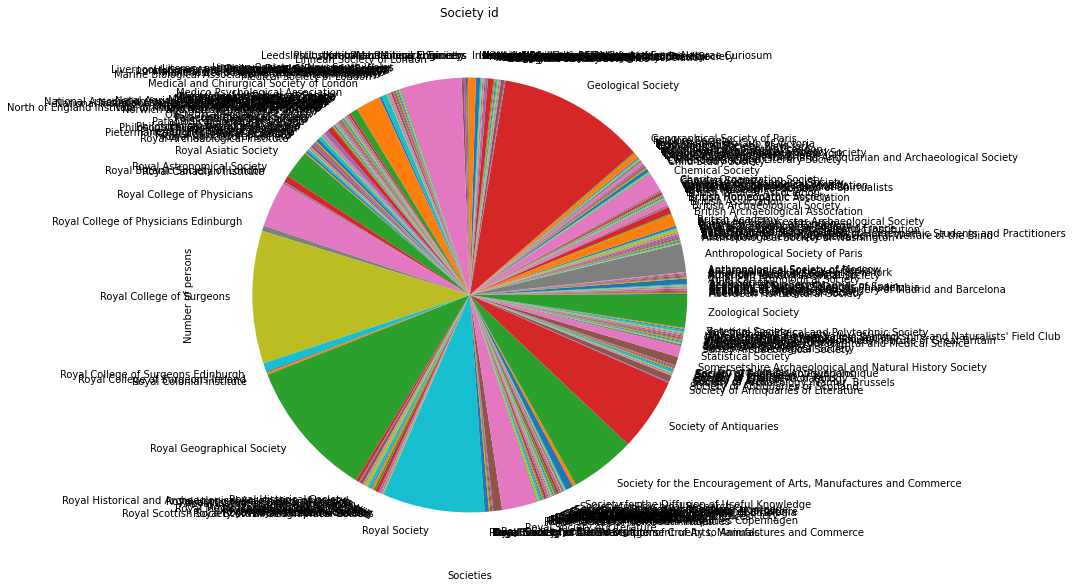

In [8]:
tuples.groupby('Target')['Source'].nunique().plot(kind='pie')
plt.title ("Society id")
plt.xlabel ("Societies")
plt.ylabel ("Number of persons")
plt.show()

## Iterative Section 2 - prepare the data for rendering as a graph in Gephi ##

### Caution - this section depends on the selections made under 'Iterative Section 1' above ###

If the initial analysis suggests that a more insightful visualisation might be made by refing the data to be analysed, return to the database and make a new Nodes (Names) csv file and a new Tuples csv file conaining only well populated groups.

Then return to Iterative Section 1 codeblock in the workbook and replace the csv files in the 'with open' code lines with the refined datasets.

Finally reset the nx.write_gexf (xxx.gexf) xxx statement to a new file name.

Then run all code blocks again and make a more insightful gexf file. Use that to produce an improved network graph for Stage 2 analysis.

Warning. - Ensure that the statement 'nx.write_gexf' in the last code cell in this section points to a new output file for Gephi. (eg., G, 'xxxx_10.gexf')Failure to set this value correctly will result in the previously generated .gexf file being overwritten instead.


In [14]:
print("Nodes length: ", len(node_names))
print("Edges length: ", len(edges))
# not used this time. print("Edges attributes length: ", len(edges_attributes)) # This should be the same length as edges

Nodes length:  618
Edges length:  858


In [15]:
# First check that the data is correctly formatted

print("First 5 nodes:", node_names[0:5])
print("First 5 edges:", edges[0:5])
# not used this time. print("First 5 edges attributes:", edges_attributes[0:5])

# The output will appear below this code cell.

First 5 nodes: ['A , jun Ramsay', 'A G Cross', 'A Ioannides', 'Alan Cornwall Blackstone', 'Alexander McArthur']
First 5 edges: [('William (2) Adams', 'Royal College of Surgeons'), ('William (2) Adams', 'Medical and Chirurgical Society of London'), ('William Francis Harrison Ainsworth', 'Royal Geographical Society'), ('William Francis Harrison Ainsworth', 'Society of Antiquaries'), ('William Francis Harrison Ainsworth', 'Geological Society')]


In [16]:
# We use NetworkX to build the graph data into a table

G = nx.Graph()
G.add_nodes_from(node_names)
G.add_edges_from(edges)
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 618
Number of edges: 858
Average degree:   2.7767


In [17]:
# Finally we can write a gexf file which will be placed in the root directory.
# We can then open the file in Gephi and visualise the network.

nx.write_gexf(G, 'society_10.gexf')

## Stage 2 - Occupations analysis with 'noise' removed (low populated locations excluded). ##

We now re-run the code to generate a new gexf file for gephi. We use the refined pair of nodes (Names) and Tuples files generated in the SQL database that include only the top 10 locations.

In [18]:
society_10_names

,Name
0,"A , jun Ramsay"
1,A G Cross
2,A Ioannides
3,Alan Cornwall Blackstone
4,Alexander McArthur
...,...
613,x Milton
614,x Moon
615,"x Ripon, De Grey and"
616,x Rosehill


In [19]:
society_10_tuples

,Source,Target
0,William (2) Adams,Royal College of Surgeons
1,William (2) Adams,Medical and Chirurgical Society of London
2,William Francis Harrison Ainsworth,Royal Geographical Society
3,William Francis Harrison Ainsworth,Society of Antiquaries
4,William Francis Harrison Ainsworth,Geological Society
...,...,...
853,Charles H L Woodd,"Society for the Encouragement of Arts, Manufac..."
854,Thomas Wright,Society of Antiquaries
855,William Cort Wright,Chemical Society
856,W Holt Yates,Royal College of Physicians


## We now have a graph of the dataset that can be analysed more easily ##

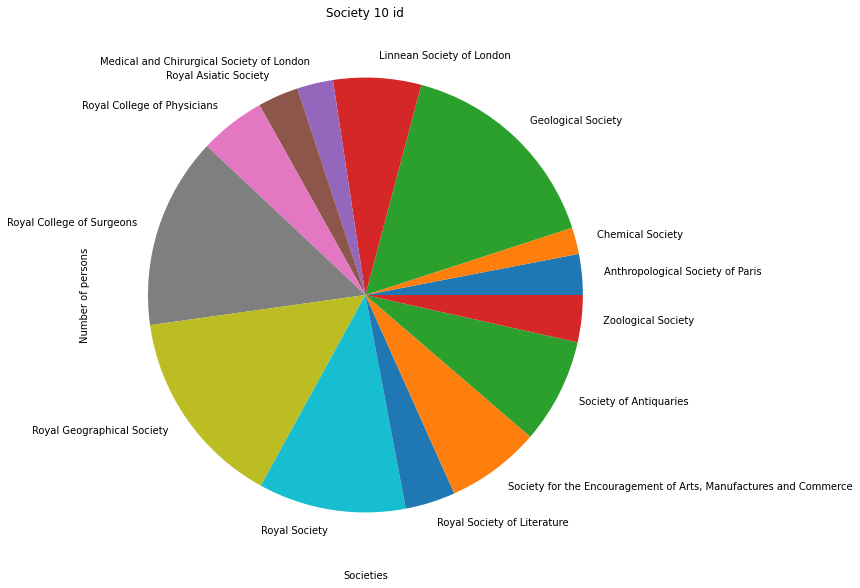

In [21]:
society_10_tuples.groupby('Target')['Source'].nunique().plot(kind='pie')
plt.title ("Society 10 id")
plt.xlabel ("Societies")
plt.ylabel ("Number of persons")
plt.show()

<img src="society_10.png">

We can see that 'Geological Society' and the 'Royal Goegraphical Society' together account for a significant number of members by society. The 'Royal College of Surgeons', the 'Medical and Chirurgical Society' and the 'College of Physicians' form the next largest cluster of memberships of societies. These two clusters each contain many members who have no association with any other society. We can see that the medical group and the geographical group have few members in common. The 'Royal Society' and the 'Linnean Society' in the centre have between them the greatest level of networking amongst all of the societies. It is highly likely that these members served as conduits of communication and group cohesion amongst the two principal society groups. 

Many other societies have a range of members all of whom are highly interconnected. All of the satellite groups relate most closely to the 'Royal Society' and the 'Linnean Society' rather than to the two larger clusters. Many members of the smaller satellite societies are also associated with more that one other satellite occupation.

It is surprising the the least networked occupation is the 'Royal College of Surgeons' and perhaps less so that the 'Geological Society' and the 'Royal Geographical Society' are highly networked.

Several individuals form a web of interconnectedness between the members of societies. 